# Reinforcement Learning: Zero to Hero - Part 3/17

**Cells 41-60 of 291**



#### Discounted Return and Value Functions

**From Immediate Rewards to Long-Term Value**

In reinforcement learning, we don't just care about immediate rewards - we want to maximize the **total reward over time**. This leads us to the concepts of return and value functions.

**The Return (Cumulative Reward)**

The **return** $G_t$ at time $t$ is the total discounted reward from that point forward:

$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + ...$

Or more compactly:

$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$

**The Discount Factor γ (Gamma)**

The discount factor $\gamma \in [0, 1]$ determines how much we value future rewards:

- **$\gamma = 0$**: Only immediate reward matters (myopic)
  - $G_t = R_{t+1}$
  - Agent is short-sighted

- **$\gamma = 1$**: All future rewards equally important (far-sighted)
  - $G_t = R_{t+1} + R_{t+2} + R_{t+3} + ...$
  - Can lead to infinite returns in continuing tasks

- **$\gamma \in (0, 1)$**: Balance between immediate and future rewards
  - Typical values: 0.9, 0.95, 0.99
  - Ensures finite returns even in infinite horizons

**Why Discount Future Rewards?**

1. **Mathematical Convenience**: Ensures convergence for infinite horizons
2. **Uncertainty**: Future is uncertain, so future rewards are less reliable
3. **Preference**: Often prefer rewards sooner rather than later
4. **Computational**: Makes the problem tractable

**Example - Effect of Gamma:**

Suppose we receive rewards: [1, 1, 1, 1, 1]

- $\gamma = 0.0$: $G = 1$ (only first reward)
- $\gamma = 0.5$: $G = 1 + 0.5 + 0.25 + 0.125 + 0.0625 = 1.9375$
- $\gamma = 0.9$: $G = 1 + 0.9 + 0.81 + 0.729 + 0.6561 = 4.0951$
- $\gamma = 1.0$: $G = 5$ (all rewards equally)

Let's implement a function to calculate discounted returns:

In [20]:
def calculate_discounted_return(rewards, gamma):
    """Calculate the discounted return for a sequence of rewards.
    
    Args:
        rewards: List or array of rewards [r1, r2, r3, ...]
        gamma: Discount factor (0 to 1)
        
    Returns:
        G: The discounted return
    """
    G = 0
    for t, reward in enumerate(rewards):
        G += (gamma ** t) * reward
    return G


def calculate_returns_to_go(rewards, gamma):
    """Calculate return-to-go for each time step.
    
    Return-to-go at time t is the discounted sum of rewards from t onward.
    
    Args:
        rewards: List of rewards [r1, r2, r3, ...]
        gamma: Discount factor
        
    Returns:
        returns: List of returns-to-go [G0, G1, G2, ...]
    """
    returns = []
    G = 0
    
    # Calculate backwards for efficiency
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    
    return returns


# Demonstrate discounted return calculation
print("Discounted Return Calculation")
print("="*60)

# Example reward sequence
rewards = [1, 1, 1, 1, 1]
print(f"Reward sequence: {rewards}")

# Calculate for different gamma values
gamma_values = [0.0, 0.5, 0.9, 0.99, 1.0]

print("Effect of Discount Factor γ:")
print("-" * 60)
print(f"{'γ':<10} {'Discounted Return':<20} {'Interpretation'}")
print("-" * 60)

for gamma in gamma_values:
    G = calculate_discounted_return(rewards, gamma)
    
    if gamma == 0.0:
        interp = "Only immediate reward"
    elif gamma == 1.0:
        interp = "All rewards equally"
    elif gamma < 0.5:
        interp = "Very myopic"
    elif gamma < 0.9:
        interp = "Moderately far-sighted"
    else:
        interp = "Very far-sighted"
    
    print(f"{gamma:<10.2f} {G:<20.4f} {interp}")

print("" + "="*60)

# Example with varying rewards
print("Example with Varying Rewards:")
rewards2 = [1, 2, 3, 4, 5]
gamma = 0.9

print(f"Rewards: {rewards2}")
print(f"γ = {gamma}")

G = calculate_discounted_return(rewards2, gamma)
print(f"Total discounted return: {G:.4f}")

# Show the calculation step by step
print("Step-by-step calculation:")
print(f"G = {rewards2[0]} + {gamma}×{rewards2[1]} + {gamma}²×{rewards2[2]} + {gamma}³×{rewards2[3]} + {gamma}⁴×{rewards2[4]}")
print(f"G = {rewards2[0]} + {gamma*rewards2[1]:.2f} + {gamma**2*rewards2[2]:.2f} + {gamma**3*rewards2[3]:.2f} + {gamma**4*rewards2[4]:.2f}")
print(f"G = {G:.4f}")

# Calculate returns-to-go
returns_to_go = calculate_returns_to_go(rewards2, gamma)
print("Returns-to-go at each time step:")
for t, (r, G_t) in enumerate(zip(rewards2, returns_to_go)):
    print(f"  t={t}: Reward={r}, Return-to-go G_{t}={G_t:.4f}")

Discounted Return Calculation
Reward sequence: [1, 1, 1, 1, 1]
Effect of Discount Factor γ:
------------------------------------------------------------
γ          Discounted Return    Interpretation
------------------------------------------------------------
0.00       1.0000               Only immediate reward
0.50       1.9375               Moderately far-sighted
0.90       4.0951               Very far-sighted
0.99       4.9010               Very far-sighted
1.00       5.0000               All rewards equally
Example with Varying Rewards:
Rewards: [1, 2, 3, 4, 5]
γ = 0.9
Total discounted return: 11.4265
Step-by-step calculation:
G = 1 + 0.9×2 + 0.9²×3 + 0.9³×4 + 0.9⁴×5
G = 1 + 1.80 + 2.43 + 2.92 + 3.28
G = 11.4265
Returns-to-go at each time step:
  t=0: Reward=1, Return-to-go G_0=11.4265
  t=1: Reward=2, Return-to-go G_1=11.5850
  t=2: Reward=3, Return-to-go G_2=10.6500
  t=3: Reward=4, Return-to-go G_3=8.5000
  t=4: Reward=5, Return-to-go G_4=5.0000


#### Value Functions: Estimating Long-Term Value

**From Returns to Value Functions**

While the return $G_t$ tells us the actual cumulative reward from a specific trajectory, **value functions** tell us the **expected** return from a state or state-action pair.

**State-Value Function V(s)**

The **state-value function** $V^\pi(s)$ is the expected return starting from state $s$ and following policy $\pi$:

$V^\pi(s) = \mathbb{E}_\pi[G_t | S_t = s]$

$V^\pi(s) = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s\right]$

**Interpretation:**
- "How good is it to be in state $s$?"
- Expected cumulative reward if we start in $s$ and follow policy $\pi$
- Depends on the policy being followed

**Action-Value Function Q(s,a)**

The **action-value function** $Q^\pi(s,a)$ is the expected return starting from state $s$, taking action $a$, then following policy $\pi$:

$Q^\pi(s,a) = \mathbb{E}_\pi[G_t | S_t = s, A_t = a]$

$Q^\pi(s,a) = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s, A_t = a\right]$

**Interpretation:**
- "How good is it to take action $a$ in state $s$?"
- Expected cumulative reward if we start in $s$, take action $a$, then follow $\pi$
- Also called Q-values (hence "Q-learning")

**Relationship Between V and Q:**

The state-value is the expected action-value under the policy:

$V^\pi(s) = \sum_a \pi(a|s) Q^\pi(s,a)$

For a deterministic policy that always chooses action $a^*$ in state $s$:

$V^\pi(s) = Q^\pi(s, a^*)$

**Optimal Value Functions:**

The **optimal state-value function** $V^*(s)$ is the maximum value achievable in state $s$:

$V^*(s) = \max_\pi V^\pi(s)$

The **optimal action-value function** $Q^*(s,a)$ is the maximum value achievable by taking action $a$ in state $s$:

$Q^*(s,a) = \max_\pi Q^\pi(s,a)$

**Key Insight:**
If we know $Q^*(s,a)$ for all states and actions, we can act optimally by choosing:

$\pi^*(s) = \arg\max_a Q^*(s,a)$

This is why Q-learning is so powerful - it learns $Q^*$ directly!

Let's demonstrate these concepts with examples:

In [21]:
# Demonstrate value functions with simple examples
print("Value Functions: V(s) and Q(s,a)")
print("="*60)

# Simple example: 3-state chain
# States: S0 -> S1 -> S2 (terminal)
# Actions: FORWARD (deterministic)
# Rewards: 0, 0, +10 (only at terminal)

print("Example: Simple 3-State Chain")
print("States: S0 → S1 → S2 (terminal)")
print("Action: FORWARD (deterministic)")
print("Rewards: R(S0→S1)=0, R(S1→S2)=10")
print("" + "-"*60)

gamma = 0.9
print(f"Discount factor γ = {gamma}")

# Calculate V(s) for each state
# V(S2) = 0 (terminal state, no future rewards)
# V(S1) = 0 + γ * 10 = 9.0
# V(S0) = 0 + γ * V(S1) = 0 + 0.9 * 9.0 = 8.1

V_S2 = 0
V_S1 = 0 + gamma * 10
V_S0 = 0 + gamma * V_S1

print("State-Value Function V(s):")
print(f"  V(S0) = {V_S0:.2f}  (2 steps to reward)")
print(f"  V(S1) = {V_S1:.2f}  (1 step to reward)")
print(f"  V(S2) = {V_S2:.2f}  (terminal state)")

print("💡 Interpretation:")
print("   - V(S0) < V(S1) because S0 is farther from the reward")
print("   - Each step away reduces value by factor of γ")
print("   - V(s) tells us 'how good' each state is")

print("" + "="*60)

# Example with multiple actions
print("Example: Grid World with Multiple Actions")
print("Consider state S with two actions:")
print("  - Action A1: Leads to goal (reward +10) with prob 0.8")
print("  - Action A2: Leads to goal (reward +10) with prob 0.3")
print("Both actions give -1 reward if they don't reach goal")

gamma = 0.9

# Q(S, A1) = 0.8 * 10 + 0.2 * (-1) = 7.8
# Q(S, A2) = 0.3 * 10 + 0.7 * (-1) = 2.3

Q_S_A1 = 0.8 * 10 + 0.2 * (-1)
Q_S_A2 = 0.3 * 10 + 0.7 * (-1)

print("Action-Value Function Q(s,a):")
print(f"  Q(S, A1) = {Q_S_A1:.2f}  (high success rate)")
print(f"  Q(S, A2) = {Q_S_A2:.2f}  (low success rate)")

print("💡 Interpretation:")
print("   - Q(S, A1) > Q(S, A2) because A1 is more likely to succeed")
print("   - Optimal action: A1 (higher Q-value)")
print("   - Q(s,a) tells us 'how good' each action is in each state")

# If following a policy that chooses A1 with prob 0.7 and A2 with prob 0.3
V_S = 0.7 * Q_S_A1 + 0.3 * Q_S_A2
print(f"If policy π(A1|S)=0.7, π(A2|S)=0.3:")
print(f"  V(S) = 0.7 × Q(S,A1) + 0.3 × Q(S,A2)")
print(f"  V(S) = 0.7 × {Q_S_A1:.2f} + 0.3 × {Q_S_A2:.2f}")
print(f"  V(S) = {V_S:.2f}")

print("" + "="*60)
print("🎯 Key Takeaways:")
print("   1. V(s): Expected return from state s")
print("   2. Q(s,a): Expected return from taking action a in state s")
print("   3. V(s) = Σ π(a|s) Q(s,a) (weighted average over actions)")
print("   4. Optimal policy: Choose action with highest Q-value")
print("   5. Value functions are the foundation of RL algorithms!")

Value Functions: V(s) and Q(s,a)
Example: Simple 3-State Chain
States: S0 → S1 → S2 (terminal)
Action: FORWARD (deterministic)
Rewards: R(S0→S1)=0, R(S1→S2)=10
------------------------------------------------------------
Discount factor γ = 0.9
State-Value Function V(s):
  V(S0) = 8.10  (2 steps to reward)
  V(S1) = 9.00  (1 step to reward)
  V(S2) = 0.00  (terminal state)
💡 Interpretation:
   - V(S0) < V(S1) because S0 is farther from the reward
   - Each step away reduces value by factor of γ
   - V(s) tells us 'how good' each state is
Example: Grid World with Multiple Actions
Consider state S with two actions:
  - Action A1: Leads to goal (reward +10) with prob 0.8
  - Action A2: Leads to goal (reward +10) with prob 0.3
Both actions give -1 reward if they don't reach goal
Action-Value Function Q(s,a):
  Q(S, A1) = 7.80  (high success rate)
  Q(S, A2) = 2.30  (low success rate)
💡 Interpretation:
   - Q(S, A1) > Q(S, A2) because A1 is more likely to succeed
   - Optimal action: A1 (hi

#### Visualizing the Effect of Discount Factor

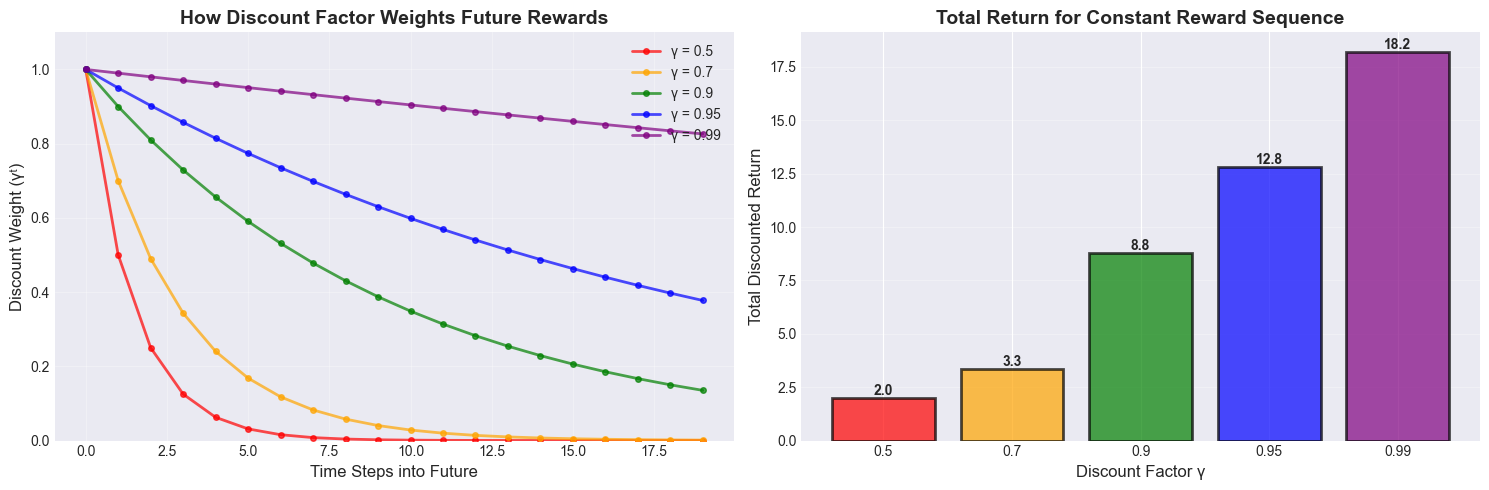

📊 Visualization Insights:
Left Plot - Discount Weights:
   - Shows how much each future reward is weighted
   - Lower γ: Future rewards decay quickly
   - Higher γ: Future rewards remain important longer
Right Plot - Total Returns:
   - Shows cumulative effect of discounting
   - γ=0.5: Only considers ~2 steps ahead effectively
   - γ=0.99: Considers ~100 steps ahead effectively
💡 Rule of thumb: Effective horizon ≈ 1/(1-γ) steps
   γ=0.5: ~2 steps
   γ=0.7: ~3 steps
   γ=0.9: ~10 steps
   γ=0.95: ~20 steps
   γ=0.99: ~100 steps


In [22]:
# Visualize how discount factor affects returns
import matplotlib.pyplot as plt

# Create a reward sequence
num_steps = 20
rewards = np.ones(num_steps)  # Constant reward of 1 at each step

# Calculate returns for different gamma values
gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]
colors = ['red', 'orange', 'green', 'blue', 'purple']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Discount weights over time
time_steps = np.arange(num_steps)
for gamma, color in zip(gamma_values, colors):
    weights = gamma ** time_steps
    ax1.plot(time_steps, weights, linewidth=2, color=color, 
            label=f'γ = {gamma}', marker='o', markersize=4, alpha=0.7)

ax1.set_xlabel('Time Steps into Future', fontsize=12)
ax1.set_ylabel('Discount Weight (γᵗ)', fontsize=12)
ax1.set_title('How Discount Factor Weights Future Rewards', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Total discounted return
returns = []
for gamma in gamma_values:
    G = calculate_discounted_return(rewards, gamma)
    returns.append(G)

bars = ax2.bar(range(len(gamma_values)), returns, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Discount Factor γ', fontsize=12)
ax2.set_ylabel('Total Discounted Return', fontsize=12)
ax2.set_title('Total Return for Constant Reward Sequence', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(gamma_values)))
ax2.set_xticklabels([f'{g}' for g in gamma_values])
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, returns):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Visualization Insights:")
print("Left Plot - Discount Weights:")
print("   - Shows how much each future reward is weighted")
print("   - Lower γ: Future rewards decay quickly")
print("   - Higher γ: Future rewards remain important longer")
print("Right Plot - Total Returns:")
print("   - Shows cumulative effect of discounting")
print("   - γ=0.5: Only considers ~2 steps ahead effectively")
print("   - γ=0.99: Considers ~100 steps ahead effectively")
print("💡 Rule of thumb: Effective horizon ≈ 1/(1-γ) steps")
for gamma in gamma_values:
    horizon = 1 / (1 - gamma)
    print(f"   γ={gamma}: ~{horizon:.0f} steps")

<a id='policies'></a>
#### Policies: Mapping States to Actions

**What is a Policy?**

A **policy** $\pi$ is a strategy that defines how the agent behaves - it maps states to actions. The policy is what the agent learns in reinforcement learning.

**Types of Policies:**

**1. Deterministic Policy**

A deterministic policy $\pi: S \rightarrow A$ maps each state to a single action:

$a = \pi(s)$

**Example:**
- In grid world: "Always move RIGHT in state (0,0)"
- In chess: "Always make the move that captures the most valuable piece"

**2. Stochastic Policy**

A stochastic policy $\pi(a|s)$ gives a probability distribution over actions for each state:

$\pi(a|s) = P(A_t = a | S_t = s)$

where $\sum_a \pi(a|s) = 1$ for all states $s$

**Example:**
- In grid world: "Move RIGHT with 70% probability, DOWN with 30% in state (0,0)"
- Epsilon-greedy: "Take best action with probability 1-ε, random action with probability ε"

**Why Stochastic Policies?**

1. **Exploration**: Randomness helps explore the environment
2. **Partial Observability**: When state is uncertain, randomization can help
3. **Game Theory**: In competitive settings, randomization prevents exploitation
4. **Continuous Actions**: Natural representation for continuous action spaces

**Optimal Policy**

The **optimal policy** $\pi^*$ maximizes the expected return from every state:

$\pi^* = \arg\max_\pi V^\pi(s) \text{ for all } s \in S$

**Key Theorem:** For any MDP, there exists an optimal deterministic policy!

This means we can always find a policy that doesn't need randomness to be optimal (though stochastic policies are still useful during learning).

Let's implement policy representations:

In [23]:
class DeterministicPolicy:
    """A deterministic policy that maps states to actions."""
    
    def __init__(self):
        """Initialize empty policy."""
        self.policy = {}  # state -> action mapping
    
    def set_action(self, state, action):
        """Set the action for a given state."""
        self.policy[state] = action
    
    def get_action(self, state):
        """Get the action for a given state."""
        return self.policy.get(state, None)
    
    def __repr__(self):
        return f"DeterministicPolicy({len(self.policy)} states)"


class StochasticPolicy:
    """A stochastic policy that gives probability distributions over actions."""
    
    def __init__(self):
        """Initialize empty policy."""
        self.policy = {}  # state -> {action: probability} mapping
    
    def set_action_probs(self, state, action_probs):
        """Set action probabilities for a given state.
        
        Args:
            state: The state
            action_probs: Dict mapping actions to probabilities
        """
        # Verify probabilities sum to 1
        total = sum(action_probs.values())
        if not np.isclose(total, 1.0):
            raise ValueError(f"Action probabilities must sum to 1, got {total}")
        self.policy[state] = action_probs.copy()
    
    def get_action_prob(self, state, action):
        """Get probability of taking action in state."""
        return self.policy.get(state, {}).get(action, 0.0)
    
    def sample_action(self, state):
        """Sample an action according to the policy."""
        action_probs = self.policy.get(state, {})
        if not action_probs:
            return None
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)
    
    def __repr__(self):
        return f"StochasticPolicy({len(self.policy)} states)"


# Demonstrate policy representations
print("Policy Representations")
print("="*60)

# Example 1: Deterministic policy for 2x2 grid
print("Example 1: Deterministic Policy for 2x2 Grid")

det_policy = DeterministicPolicy()
det_policy.set_action('(0,0)', 'RIGHT')
det_policy.set_action('(0,1)', 'DOWN')
det_policy.set_action('(1,0)', 'RIGHT')
det_policy.set_action('(1,1)', 'STAY')  # Goal state

print("Deterministic Policy π(s):")
for state in ['(0,0)', '(0,1)', '(1,0)', '(1,1)']:
    action = det_policy.get_action(state)
    print(f"  π({state}) = {action}")

print("💡 This policy always takes the same action in each state")

print("" + "="*60)

# Example 2: Stochastic policy
print("Example 2: Stochastic Policy (Exploration)")

stoch_policy = StochasticPolicy()

# State (0,0): Prefer RIGHT but sometimes go DOWN
stoch_policy.set_action_probs('(0,0)', {'RIGHT': 0.7, 'DOWN': 0.3})

# State (0,1): Prefer DOWN
stoch_policy.set_action_probs('(0,1)', {'RIGHT': 0.1, 'DOWN': 0.9})

# State (1,0): Prefer RIGHT
stoch_policy.set_action_probs('(1,0)', {'RIGHT': 0.9, 'DOWN': 0.1})

print("Stochastic Policy π(a|s):")
for state in ['(0,0)', '(0,1)', '(1,0)']:
    print(f"  State {state}:")
    for action in ['RIGHT', 'DOWN']:
        prob = stoch_policy.get_action_prob(state, action)
        if prob > 0:
            print(f"    π({action}|{state}) = {prob:.1f}")

print("💡 This policy has randomness - different actions with different probabilities")

# Sample actions from stochastic policy
print("Sampling 10 actions from state (0,0):")
samples = [stoch_policy.sample_action('(0,0)') for _ in range(10)]
print(f"  Actions: {samples}")
right_count = samples.count('RIGHT')
down_count = samples.count('DOWN')
print(f"  RIGHT: {right_count}/10 ({right_count*10}%), DOWN: {down_count}/10 ({down_count*10}%)")
print(f"  Expected: RIGHT: 70%, DOWN: 30%")

print("" + "="*60)
print("🎯 Key Points:")
print("   1. Deterministic: π(s) → single action")
print("   2. Stochastic: π(a|s) → probability distribution")
print("   3. Optimal policies can be deterministic")
print("   4. Stochastic policies useful for exploration during learning")

Policy Representations
Example 1: Deterministic Policy for 2x2 Grid
Deterministic Policy π(s):
  π((0,0)) = RIGHT
  π((0,1)) = DOWN
  π((1,0)) = RIGHT
  π((1,1)) = STAY
💡 This policy always takes the same action in each state
Example 2: Stochastic Policy (Exploration)
Stochastic Policy π(a|s):
  State (0,0):
    π(RIGHT|(0,0)) = 0.7
    π(DOWN|(0,0)) = 0.3
  State (0,1):
    π(RIGHT|(0,1)) = 0.1
    π(DOWN|(0,1)) = 0.9
  State (1,0):
    π(RIGHT|(1,0)) = 0.9
    π(DOWN|(1,0)) = 0.1
💡 This policy has randomness - different actions with different probabilities
Sampling 10 actions from state (0,0):
  Actions: [np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('RIGHT'), np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('RIGHT')]
  RIGHT: 7/10 (70%), DOWN: 3/10 (30%)
  Expected: RIGHT: 70%, DOWN: 30%
🎯 Key Points:
   1. Deterministic: π(s) → single action
   2. Stochastic: π(a|s) → probability distribution
   3. Optimal policies can b

#### Bellman Equations: The Foundation of RL Algorithms

**The Bellman Equations**

The **Bellman equations** are fundamental recursive relationships that express value functions in terms of themselves. They are the mathematical foundation for most RL algorithms.

**Bellman Equation for V(s):**

The value of a state equals the expected immediate reward plus the discounted value of the next state:

$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

**In words:**
1. Consider all possible actions under policy $\pi$
2. For each action, consider all possible next states
3. Sum up: immediate reward + discounted value of next state
4. Weight by probabilities

**Bellman Equation for Q(s,a):**

$Q^\pi(s,a) = \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma \sum_{a'} \pi(a'|s') Q^\pi(s',a')\right]$

**Bellman Optimality Equations:**

For the optimal value functions:

$V^*(s) = \max_a \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^*(s')\right]$

$Q^*(s,a) = \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma \max_{a'} Q^*(s',a')\right]$

**Why Are Bellman Equations Important?**

1. **Recursive Structure**: Break down long-term value into immediate reward + future value
2. **Dynamic Programming**: Enable iterative computation of value functions
3. **Temporal Difference Learning**: Basis for TD learning and Q-learning
4. **Optimality**: Optimal policies satisfy the Bellman optimality equations

**The Bellman Deadlock**

The Bellman equations create a system of equations where:
- Each value depends on other values
- We have $|S|$ equations with $|S|$ unknowns (for V)
- Or $|S| \times |A|$ equations with $|S| \times |A|$ unknowns (for Q)

**The Problem:**
- Can't solve directly because values are defined in terms of each other
- This circular dependency is called the "Bellman deadlock"

**Solutions:**
1. **Iterative Methods**: Dynamic Programming (policy evaluation, value iteration)
2. **Sampling Methods**: Monte Carlo, Temporal Difference learning
3. **Function Approximation**: Neural networks for large state spaces

**The Curse of Dimensionality**

As the state space grows, computational requirements explode:

- **Tabular Methods**: Need to store value for every state
  - 10 binary features → $2^{10} = 1,024$ states
  - 20 binary features → $2^{20} = 1,048,576$ states
  - 30 binary features → $2^{30} = 1,073,741,824$ states

- **Continuous States**: Infinite states (e.g., robot position)

**Addressing the Curse:**
1. **Function Approximation**: Learn V(s) or Q(s,a) with neural networks
2. **Sampling**: Don't visit all states, learn from experience
3. **Generalization**: Use features to generalize across similar states
4. **Hierarchical Methods**: Break problem into subproblems

Let's demonstrate the Bellman equations with a simple example:

In [24]:
# Demonstrate Bellman equations with policy evaluation
print("Bellman Equations: Policy Evaluation Example")
print("="*60)

# Use our 2x2 grid MDP from earlier
states = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
gamma = 0.9

# Define a simple policy: always go RIGHT from (0,0) and (1,0), DOWN from (0,1)
policy = {
    '(0,0)': {'RIGHT': 1.0},
    '(0,1)': {'DOWN': 1.0},
    '(1,0)': {'RIGHT': 1.0},
    '(1,1)': {'RIGHT': 1.0}  # Terminal, doesn't matter
}

# Transitions and rewards (from earlier MDP)
transitions = {
    ('(0,0)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,1)', 'DOWN'): {'(1,1)': 1.0},
    ('(1,0)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,1)', 'RIGHT'): {'(1,1)': 1.0},
}

rewards = {
    ('(0,0)', 'RIGHT', '(0,1)'): -1,
    ('(0,1)', 'DOWN', '(1,1)'): 10,
    ('(1,0)', 'RIGHT', '(1,1)'): 10,
    ('(1,1)', 'RIGHT', '(1,1)'): 0,
}

print("MDP Setup:")
print("  States: (0,0) → (0,1) → (1,1) [GOAL]")
print("           ↓       ↓")
print("         (1,0) → (1,1) [GOAL]")
print(f"  Discount factor γ = {gamma}")
print("  Policy π:")
for state, actions in policy.items():
    for action, prob in actions.items():
        if prob > 0:
            print(f"    π({state}) = {action}")

print("" + "-"*60)
print("Applying Bellman Equation: V(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV(s')]")

# Iterative policy evaluation
V = {s: 0.0 for s in states}  # Initialize values to 0
V['(1,1)'] = 0.0  # Terminal state

print("Iteration 0 (Initial):")
for state in states:
    print(f"  V({state}) = {V[state]:.2f}")

# Perform a few iterations
for iteration in range(1, 6):
    V_new = V.copy()
    
    for state in states:
        if state == '(1,1)':  # Terminal state
            continue
        
        # Apply Bellman equation
        v = 0.0
        for action, action_prob in policy[state].items():
            # Get transitions for this state-action pair
            next_states = transitions.get((state, action), {})
            
            for next_state, trans_prob in next_states.items():
                reward = rewards.get((state, action, next_state), 0.0)
                # Bellman equation: R + γ * V(s')
                v += action_prob * trans_prob * (reward + gamma * V[next_state])
        
        V_new[state] = v
    
    V = V_new
    
    print(f"Iteration {iteration}:")
    for state in states:
        print(f"  V({state}) = {V[state]:.2f}")

print("" + "="*60)
print("💡 Observations:")
print("   1. Values converge through iterative application of Bellman equation")
print("   2. V(1,1) = 0 (terminal state, no future rewards)")
print("   3. V(0,1) and V(1,0) are high (one step from goal)")
print("   4. V(0,0) is lower (two steps from goal, more discounting)")
print("   5. Each iteration uses previous values to compute new values")

print("" + "="*60)
print("🎯 Key Insights:")
print("   1. Bellman equations express values recursively")
print("   2. Can't solve directly (circular dependency = Bellman deadlock)")
print("   3. Iterative methods converge to true values")
print("   4. This is the foundation of Dynamic Programming!")

Bellman Equations: Policy Evaluation Example
MDP Setup:
  States: (0,0) → (0,1) → (1,1) [GOAL]
           ↓       ↓
         (1,0) → (1,1) [GOAL]
  Discount factor γ = 0.9
  Policy π:
    π((0,0)) = RIGHT
    π((0,1)) = DOWN
    π((1,0)) = RIGHT
    π((1,1)) = RIGHT
------------------------------------------------------------
Applying Bellman Equation: V(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV(s')]
Iteration 0 (Initial):
  V((0,0)) = 0.00
  V((0,1)) = 0.00
  V((1,0)) = 0.00
  V((1,1)) = 0.00
Iteration 1:
  V((0,0)) = -1.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 2:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 3:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 4:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 5:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
💡 Observations:
   1. Values converge through iterative application of Bel

#### Visualizing the Curse of Dimensionality

C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\2893644564.py:57: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\2893644564.py:57: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ibrah\anaconda3\envs\interview_prep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ibrah\anaconda3\envs\interview_prep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


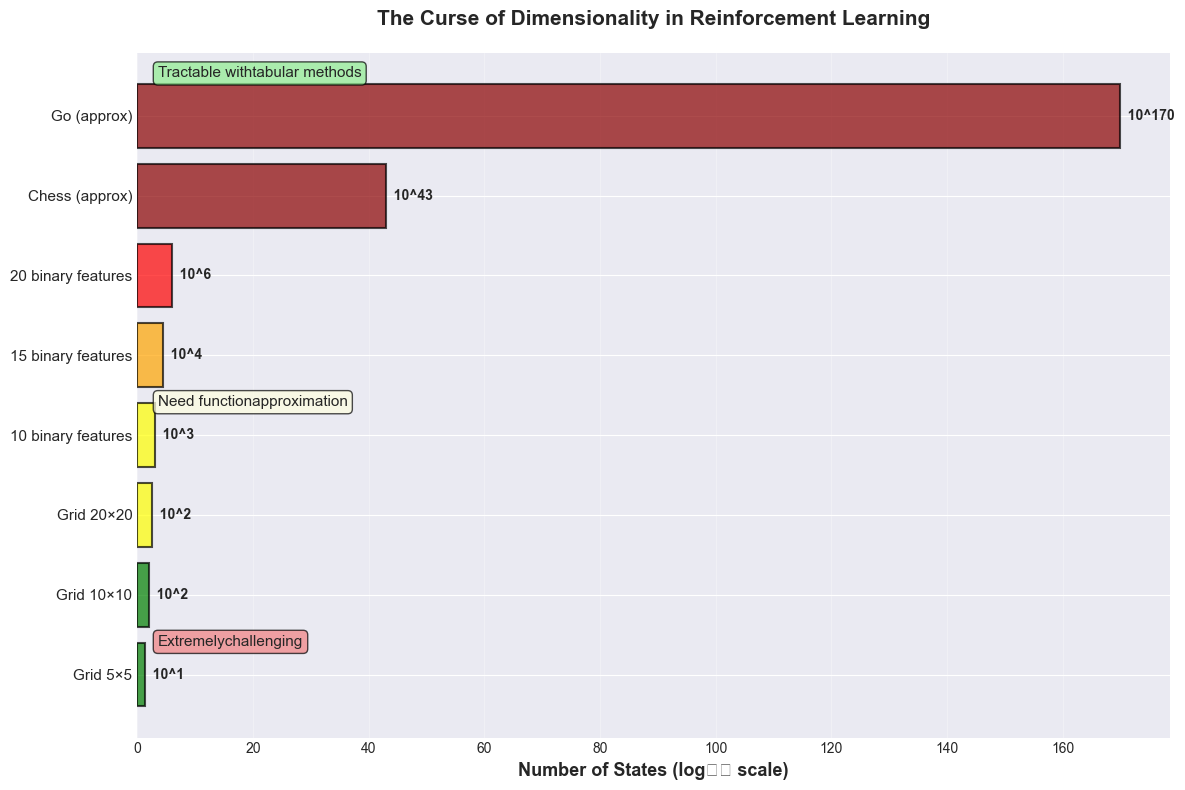

📊 The Curse of Dimensionality:
State Space Growth:
  Grid 5×5                                    25 states
  Grid 10×10                                 100 states
  Grid 20×20                                 400 states
  10 binary features                       1,024 states
  15 binary features                      32,768 states
  20 binary features                   1,048,576 states
  Chess (approx)                              43 states
  Go (approx)                                170 states
💡 Key Insights:
   1. State space grows exponentially with features
   2. Tabular methods only work for small state spaces
   3. Real-world problems need function approximation
   4. Deep RL uses neural networks to handle large spaces
   5. Sampling and generalization are essential!
🎯 Summary of MDP Framework:
   We've covered the complete MDP framework:
   ✓ Core terminology (agent, environment, state, action, reward)
   ✓ MDP components (S, A, P, R, γ)
   ✓ Markov Property and its importance
  

In [25]:
# Visualize the curse of dimensionality
import matplotlib.pyplot as plt

# Calculate state space sizes for different scenarios
# Store as (name, exponent) to avoid overflow
scenarios = [
    ('Grid 5×5', np.log10(25)),
    ('Grid 10×10', np.log10(100)),
    ('Grid 20×20', np.log10(400)),
    ('10 binary features', np.log10(2**10)),
    ('15 binary features', np.log10(2**15)),
    ('20 binary features', np.log10(2**20)),
    ('Chess (approx)', 43),
    ('Go (approx)', 170)
]

names = [s[0] for s in scenarios]
log_sizes = [s[1] for s in scenarios]

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Use log scale for y-axis
y_pos = np.arange(len(names))
colors = ['green', 'green', 'yellow', 'yellow', 'orange', 'red', 'darkred', 'darkred']

bars = ax.barh(y_pos, log_sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(names, fontsize=11)
ax.set_xlabel('Number of States (log₁₀ scale)', fontsize=13, fontweight='bold')
ax.set_title('The Curse of Dimensionality in Reinforcement Learning', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, log_size) in enumerate(zip(bars, log_sizes)):
    exp = int(log_size)
    label = f'10^{exp}'
    
    ax.text(log_size, bar.get_y() + bar.get_height()/2, f'  {label}',
           va='center', ha='left', fontsize=10, fontweight='bold')

# Add annotations
ax.text(0.02, 0.98, 'Tractable withtabular methods', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.text(0.02, 0.50, 'Need functionapproximation', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

ax.text(0.02, 0.15, 'Extremelychallenging', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 The Curse of Dimensionality:")
print("" + "="*60)
print("State Space Growth:")
# Recreate actual sizes for printing
actual_scenarios = [
    ('Grid 5×5', 25),
    ('Grid 10×10', 100),
    ('Grid 20×20', 400),
    ('10 binary features', 2**10),
    ('15 binary features', 2**15),
    ('20 binary features', 2**20),
    ('Chess (approx)', 43),
    ('Go (approx)', 170)
]
for name, size in actual_scenarios:
    if isinstance(size, int) and size < 10**10:
        print(f"  {name:<25} {size:>20,} states")
    else:
        if isinstance(size, int) and size >= 10**10:
            exp = int(np.log10(size))
        else:
            exp = size
        print(f"  {name:<25} ~10^{exp} states")

print("" + "="*60)
print("💡 Key Insights:")
print("   1. State space grows exponentially with features")
print("   2. Tabular methods only work for small state spaces")
print("   3. Real-world problems need function approximation")
print("   4. Deep RL uses neural networks to handle large spaces")
print("   5. Sampling and generalization are essential!")

print("" + "="*60)
print("🎯 Summary of MDP Framework:")
print("   We've covered the complete MDP framework:")
print("   ✓ Core terminology (agent, environment, state, action, reward)")
print("   ✓ MDP components (S, A, P, R, γ)")
print("   ✓ Markov Property and its importance")
print("   ✓ Discounted returns and value functions")
print("   ✓ Policies (deterministic and stochastic)")
print("   ✓ Bellman equations (foundation of RL algorithms)")
print("   ✓ Challenges (Bellman deadlock, curse of dimensionality)")
print("   Next: We'll learn algorithms to solve MDPs!")

<a id='dynamic-programming'></a>
### Dynamic Programming: Solving MDPs with Perfect Knowledge

**From Theory to Algorithms**

Now that we understand the Bellman equations, we can use them to solve MDPs! **Dynamic Programming (DP)** methods provide exact solutions when we have perfect knowledge of the environment's dynamics.

**What is Dynamic Programming?**

Dynamic Programming is a general approach to solving complex problems by:
1. Breaking them into simpler subproblems
2. Solving each subproblem once
3. Storing solutions to avoid recomputation
4. Combining solutions to solve the original problem

In RL, DP uses the Bellman equations to iteratively compute value functions.

**Key Assumptions for DP:**

1. **Perfect Model**: We know $P(s'|s,a)$ and $R(s,a,s')$ for all states and actions
2. **Finite State/Action Spaces**: Can enumerate all states and actions
3. **Markov Property**: Future depends only on current state

**Two Main DP Algorithms:**

1. **Policy Evaluation**: Compute $V^\pi(s)$ for a given policy $\pi$
2. **Policy Improvement**: Find a better policy given $V^\pi(s)$

Combining these gives us **Policy Iteration** and **Value Iteration** algorithms.

**Why Study DP?**

Even though DP requires perfect knowledge (rarely available in practice), it's important because:
- Provides theoretical foundation for RL
- Many RL algorithms are approximate DP methods
- Helps understand convergence and optimality
- Works well for planning problems (e.g., robotics with simulators)

Let's start with Policy Evaluation!

#### Policy Evaluation: Computing the Value Function

**The Problem:**

Given a policy $\pi$, compute the state-value function $V^\pi(s)$ for all states.

**The Bellman Equation for Policy Evaluation:**

$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

This is a system of $|S|$ linear equations with $|S|$ unknowns. We could solve it directly, but for large state spaces, we use an **iterative approach**.

**Iterative Policy Evaluation Algorithm:**

1. Initialize $V(s) = 0$ for all states (or any arbitrary values)
2. Repeat until convergence:
   - For each state $s$:
     - $V_{k+1}(s) \leftarrow \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V_k(s')\right]$
3. Stop when $\max_s |V_{k+1}(s) - V_k(s)| < \theta$ (small threshold)

**Key Insights:**

- Each iteration applies the Bellman equation as an update rule
- Uses old values $V_k(s')$ to compute new values $V_{k+1}(s)$
- Guaranteed to converge to $V^\pi$ as $k \rightarrow \infty$
- Called "bootstrapping" - using estimates to update estimates

**Two Variants:**

1. **Synchronous**: Update all states using old values, then replace all at once
2. **Asynchronous**: Update states one at a time, using most recent values

Asynchronous often converges faster in practice.

Let's implement policy evaluation!

In [26]:
def policy_evaluation(mdp, policy, gamma=0.9, theta=0.0001, max_iterations=1000):
    """Evaluate a policy using iterative policy evaluation.
    
    Args:
        mdp: MDP object with states, actions, transitions, rewards
        policy: Dict mapping state -> {action: probability}
        gamma: Discount factor
        theta: Convergence threshold
        max_iterations: Maximum number of iterations
        
    Returns:
        V: Dict mapping state -> value
        iterations: Number of iterations until convergence
    """
    # Initialize value function to zero
    V = {s: 0.0 for s in mdp.states}
    
    for iteration in range(max_iterations):
        delta = 0  # Track maximum change in value
        V_new = V.copy()
        
        # Update value for each state
        for state in mdp.states:
            v = 0.0
            
            # Sum over all actions according to policy
            for action, action_prob in policy.get(state, {}).items():
                # Sum over all possible next states
                next_states = mdp.transitions.get((state, action), {})
                
                for next_state, trans_prob in next_states.items():
                    reward = mdp.rewards.get((state, action, next_state), 0.0)
                    # Bellman equation
                    v += action_prob * trans_prob * (reward + gamma * V[next_state])
            
            V_new[state] = v
            delta = max(delta, abs(V_new[state] - V[state]))
        
        V = V_new
        
        # Check for convergence
        if delta < theta:
            print(f"Policy evaluation converged in {iteration + 1} iterations")
            return V, iteration + 1
    
    print(f"Policy evaluation reached max iterations ({max_iterations})")
    return V, max_iterations


# Demonstrate policy evaluation on our 2x2 grid MDP
print("Policy Evaluation Demonstration")
print("="*60)

# Recreate the 2x2 grid MDP
states = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
actions = ['RIGHT', 'DOWN']

transitions = {
    ('(0,0)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,0)', 'DOWN'): {'(1,0)': 1.0},
    ('(0,1)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,1)', 'DOWN'): {'(1,1)': 1.0},
    ('(1,0)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,0)', 'DOWN'): {'(1,0)': 1.0},
    ('(1,1)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,1)', 'DOWN'): {'(1,1)': 1.0},
}

rewards = {
    ('(0,0)', 'RIGHT', '(0,1)'): -1,
    ('(0,0)', 'DOWN', '(1,0)'): -1,
    ('(0,1)', 'RIGHT', '(0,1)'): -1,
    ('(0,1)', 'DOWN', '(1,1)'): 10,
    ('(1,0)', 'RIGHT', '(1,1)'): 10,
    ('(1,0)', 'DOWN', '(1,0)'): -1,
    ('(1,1)', 'RIGHT', '(1,1)'): 0,
    ('(1,1)', 'DOWN', '(1,1)'): 0,
}

mdp = SimpleMDP(states, actions, transitions, rewards, gamma=0.9)

# Define a policy: always go RIGHT from (0,0) and (1,0), DOWN from (0,1)
policy = {
    '(0,0)': {'RIGHT': 1.0},
    '(0,1)': {'DOWN': 1.0},
    '(1,0)': {'RIGHT': 1.0},
    '(1,1)': {'RIGHT': 1.0}
}

print("MDP: 2x2 Grid World")
print("  (0,0) → (0,1)")
print("    ↓       ↓")
print("  (1,0) → (1,1) [GOAL]")
print(f"Discount factor γ = {mdp.gamma}")

print("Policy π:")
for state, actions_dict in policy.items():
    for action, prob in actions_dict.items():
        if prob > 0:
            print(f"  π({state}) = {action}")

print("" + "-"*60)
print("Running Policy Evaluation...")

# Evaluate the policy
V, num_iterations = policy_evaluation(mdp, policy, gamma=0.9, theta=0.0001)

print("Final Value Function V^π(s):")
print("-"*60)
for state in states:
    print(f"  V^π({state}) = {V[state]:7.4f}")

print("" + "="*60)
print("💡 Interpretation:")
print(f"   - V^π(1,1) = {V['(1,1)']:.4f} (terminal state, no future rewards)")
print(f"   - V^π(0,1) = {V['(0,1)']:.4f} (one step from goal via DOWN)")
print(f"   - V^π(1,0) = {V['(1,0)']:.4f} (one step from goal via RIGHT)")
print(f"   - V^π(0,0) = {V['(0,0)']:.4f} (two steps from goal)")
print("   Values reflect expected cumulative reward following policy π")

Policy Evaluation Demonstration
MDP: 2x2 Grid World
  (0,0) → (0,1)
    ↓       ↓
  (1,0) → (1,1) [GOAL]
Discount factor γ = 0.9
Policy π:
  π((0,0)) = RIGHT
  π((0,1)) = DOWN
  π((1,0)) = RIGHT
  π((1,1)) = RIGHT
------------------------------------------------------------
Running Policy Evaluation...
Policy evaluation converged in 3 iterations
Final Value Function V^π(s):
------------------------------------------------------------
  V^π((0,0)) =  8.0000
  V^π((0,1)) = 10.0000
  V^π((1,0)) = 10.0000
  V^π((1,1)) =  0.0000
💡 Interpretation:
   - V^π(1,1) = 0.0000 (terminal state, no future rewards)
   - V^π(0,1) = 10.0000 (one step from goal via DOWN)
   - V^π(1,0) = 10.0000 (one step from goal via RIGHT)
   - V^π(0,0) = 8.0000 (two steps from goal)
   Values reflect expected cumulative reward following policy π


#### Visualizing Policy Evaluation Convergence

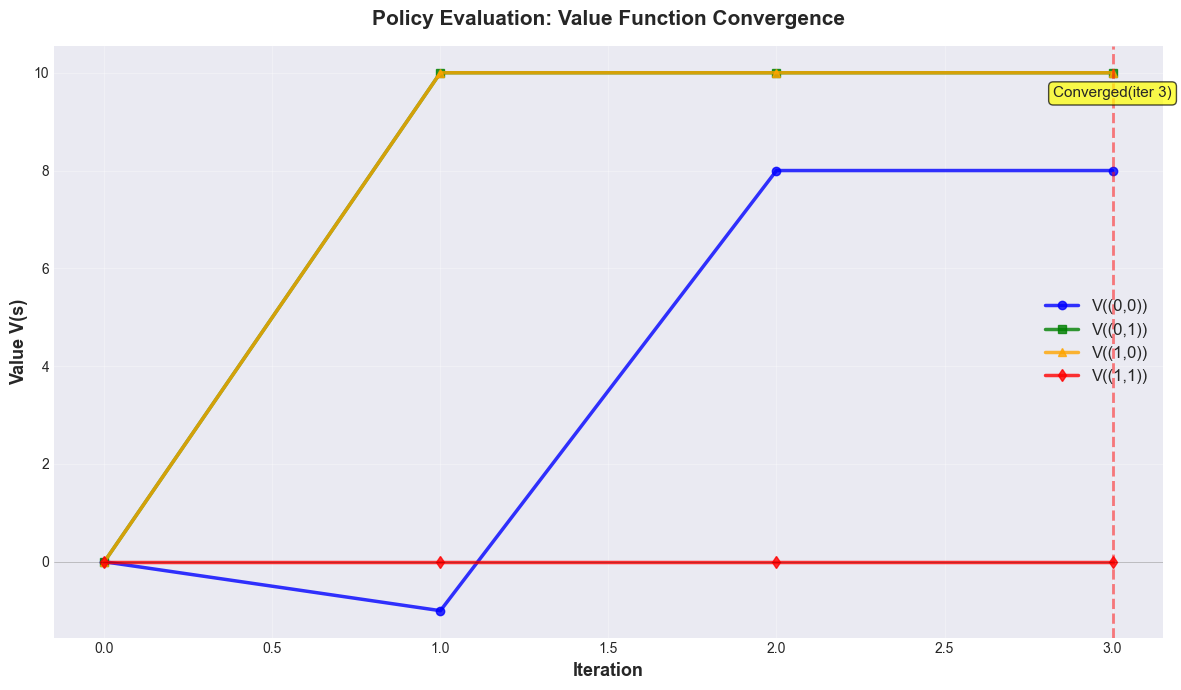

📊 Convergence Analysis:
Converged in 3 iterations
Final values:
  V((0,0)) =  8.0000
  V((0,1)) = 10.0000
  V((1,0)) = 10.0000
  V((1,1)) =  0.0000
💡 Observations:
   1. Values start at 0 and converge to true values
   2. Terminal state (1,1) stays at 0
   3. States closer to goal converge to higher values
   4. Convergence is exponentially fast
   5. Each iteration uses Bellman equation as update rule


In [27]:
# Visualize how values converge during policy evaluation
def policy_evaluation_with_history(mdp, policy, gamma=0.9, theta=0.0001, max_iterations=1000):
    """Policy evaluation that tracks value history for visualization."""
    V = {s: 0.0 for s in mdp.states}
    history = {s: [0.0] for s in mdp.states}
    
    for iteration in range(max_iterations):
        delta = 0
        V_new = V.copy()
        
        for state in mdp.states:
            v = 0.0
            for action, action_prob in policy.get(state, {}).items():
                next_states = mdp.transitions.get((state, action), {})
                for next_state, trans_prob in next_states.items():
                    reward = mdp.rewards.get((state, action, next_state), 0.0)
                    v += action_prob * trans_prob * (reward + gamma * V[next_state])
            
            V_new[state] = v
            history[state].append(v)
            delta = max(delta, abs(V_new[state] - V[state]))
        
        V = V_new
        
        if delta < theta:
            return V, history, iteration + 1
    
    return V, history, max_iterations


# Run policy evaluation with history tracking
V, history, num_iters = policy_evaluation_with_history(mdp, policy, gamma=0.9, theta=0.0001)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['blue', 'green', 'orange', 'red']
markers = ['o', 's', '^', 'd']

for state, color, marker in zip(states, colors, markers):
    iterations = range(len(history[state]))
    values = history[state]
    ax.plot(iterations, values, linewidth=2.5, color=color, marker=marker,
           markersize=6, markevery=max(1, len(iterations)//10), 
           label=f'V({state})', alpha=0.8)

ax.set_xlabel('Iteration', fontsize=13, fontweight='bold')
ax.set_ylabel('Value V(s)', fontsize=13, fontweight='bold')
ax.set_title('Policy Evaluation: Value Function Convergence', 
            fontsize=15, fontweight='bold', pad=15)
ax.legend(loc='right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add convergence annotation
ax.axvline(x=num_iters, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax.text(num_iters, ax.get_ylim()[1]*0.9, f'Converged(iter {num_iters})',
       ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 Convergence Analysis:")
print("="*60)
print(f"Converged in {num_iters} iterations")
print("Final values:")
for state in states:
    print(f"  V({state}) = {V[state]:7.4f}")

print("💡 Observations:")
print("   1. Values start at 0 and converge to true values")
print("   2. Terminal state (1,1) stays at 0")
print("   3. States closer to goal converge to higher values")
print("   4. Convergence is exponentially fast")
print("   5. Each iteration uses Bellman equation as update rule")

#### Demonstrating Policy Evaluation on a Larger Grid World

Policy Evaluation on 4x4 Grid World
Grid World: 4x4 with obstacles at (1,1) and (2,2)
Goal: (3,3)
States: 14 states
Discount factor: γ = 0.9
Policy: Stochastic policy favoring movement towards goal
Running policy evaluation...
Policy evaluation converged in 76 iterations
Value Function V^π(s) as Grid:
     Col 0    Col 1    Col 2    Col 3
   ------------------------------------------
Row 0 |   8.63    10.22    14.99    19.18  
Row 1 |  10.22     XXX     16.68    23.27  
Row 2 |  14.99    16.68     XXX     28.79  
Row 3 |  19.18    23.27    28.79    23.37  
(XXX = obstacle)


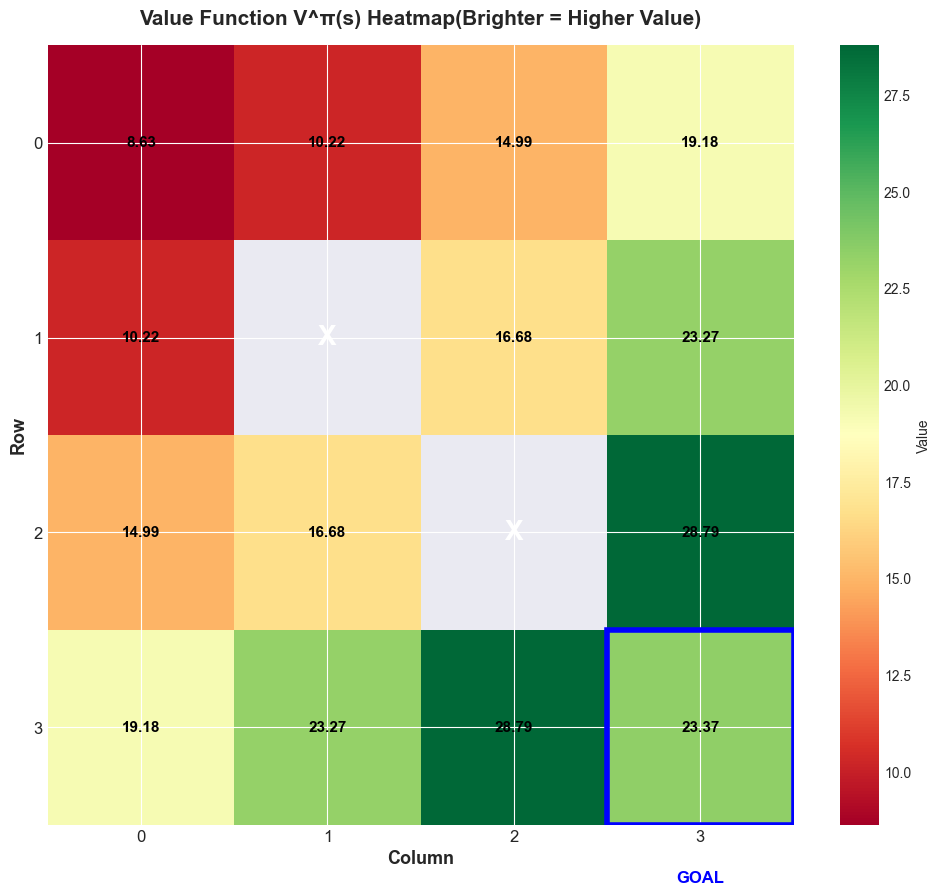

💡 Key Observations:
   1. Goal state (3,3) has highest value
   2. Values decrease with distance from goal
   3. Obstacles create 'shadows' in value function
   4. Policy evaluation successfully computed V^π for all states
   5. This tells us how good each state is under the given policy


In [28]:
# Create a larger 4x4 grid world for more interesting demonstration
def create_grid_world_mdp(size=4, goal=(3, 3), obstacles=None, gamma=0.9):
    """Create a grid world MDP.
    
    Args:
        size: Grid size (size x size)
        goal: Goal position (row, col)
        obstacles: List of obstacle positions
        gamma: Discount factor
        
    Returns:
        mdp: SimpleMDP object
    """
    if obstacles is None:
        obstacles = []
    
    # Generate all states
    states = []
    for i in range(size):
        for j in range(size):
            if (i, j) not in obstacles:
                states.append(f'({i},{j})')
    
    actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    action_effects = {'UP': (-1, 0), 'DOWN': (1, 0), 'LEFT': (0, -1), 'RIGHT': (0, 1)}
    
    transitions = {}
    rewards = {}
    
    for state_str in states:
        # Parse state
        state = eval(state_str)
        
        for action in actions:
            # Calculate next state
            delta = action_effects[action]
            next_state = (state[0] + delta[0], state[1] + delta[1])
            
            # Check if next state is valid
            if (0 <= next_state[0] < size and 0 <= next_state[1] < size and 
                next_state not in obstacles):
                next_state_str = f'({next_state[0]},{next_state[1]})'
            else:
                # Hit wall or obstacle, stay in place
                next_state_str = state_str
            
            transitions[(state_str, action)] = {next_state_str: 1.0}
            
            # Set rewards
            if next_state == goal:
                rewards[(state_str, action, next_state_str)] = 10.0
            elif next_state_str == state_str and state != goal:
                rewards[(state_str, action, next_state_str)] = -1.0  # Hit wall
            else:
                rewards[(state_str, action, next_state_str)] = -0.1  # Step cost
    
    return SimpleMDP(states, actions, transitions, rewards, gamma)


# Create 4x4 grid world
print("Policy Evaluation on 4x4 Grid World")
print("="*60)

grid_mdp = create_grid_world_mdp(size=4, goal=(3, 3), obstacles=[(1, 1), (2, 2)], gamma=0.9)

print("Grid World: 4x4 with obstacles at (1,1) and (2,2)")
print("Goal: (3,3)")
print(f"States: {len(grid_mdp.states)} states")
print(f"Discount factor: γ = {grid_mdp.gamma}")

# Create a simple policy: move towards goal (right and down preferred)
grid_policy = {}
for state_str in grid_mdp.states:
    state = eval(state_str)
    
    if state == (3, 3):  # Goal state
        grid_policy[state_str] = {'RIGHT': 0.25, 'DOWN': 0.25, 'LEFT': 0.25, 'UP': 0.25}
    else:
        # Prefer moving towards goal
        if state[0] < 3 and state[1] < 3:
            grid_policy[state_str] = {'RIGHT': 0.4, 'DOWN': 0.4, 'LEFT': 0.1, 'UP': 0.1}
        elif state[0] < 3:
            grid_policy[state_str] = {'DOWN': 0.7, 'RIGHT': 0.1, 'LEFT': 0.1, 'UP': 0.1}
        elif state[1] < 3:
            grid_policy[state_str] = {'RIGHT': 0.7, 'DOWN': 0.1, 'LEFT': 0.1, 'UP': 0.1}
        else:
            grid_policy[state_str] = {'RIGHT': 0.25, 'DOWN': 0.25, 'LEFT': 0.25, 'UP': 0.25}

print("Policy: Stochastic policy favoring movement towards goal")
print("Running policy evaluation...")

# Evaluate policy
V_grid, num_iters = policy_evaluation(grid_mdp, grid_policy, gamma=0.9, theta=0.001)

# Visualize value function as a grid
print("Value Function V^π(s) as Grid:")
print("="*60)

value_grid = np.full((4, 4), np.nan)
for state_str, value in V_grid.items():
    state = eval(state_str)
    value_grid[state[0], state[1]] = value

# Print as formatted grid
print("     Col 0    Col 1    Col 2    Col 3")
print("   " + "-"*42)
for i in range(4):
    row_str = f"Row {i} |"  
    for j in range(4):
        if np.isnan(value_grid[i, j]):
            row_str += "   XXX   "
        else:
            row_str += f" {value_grid[i, j]:6.2f}  "
    print(row_str)

print("(XXX = obstacle)")

# Create heatmap visualization
fig, ax = plt.subplots(figsize=(10, 9))

# Mask obstacles
masked_grid = np.ma.masked_where(np.isnan(value_grid), value_grid)

im = ax.imshow(masked_grid, cmap='RdYlGn', aspect='auto', interpolation='nearest')
ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(range(4), fontsize=12)
ax.set_yticklabels(range(4), fontsize=12)
ax.set_xlabel('Column', fontsize=13, fontweight='bold')
ax.set_ylabel('Row', fontsize=13, fontweight='bold')
ax.set_title('Value Function V^π(s) Heatmap(Brighter = Higher Value)', 
            fontsize=15, fontweight='bold', pad=15)

# Add value labels
for i in range(4):
    for j in range(4):
        if not np.isnan(value_grid[i, j]):
            text = ax.text(j, i, f'{value_grid[i, j]:.2f}',
                         ha="center", va="center", color="black", 
                         fontsize=11, fontweight='bold')
        else:
            text = ax.text(j, i, 'X',
                         ha="center", va="center", color="white", 
                         fontsize=20, fontweight='bold')

# Mark goal
ax.add_patch(plt.Rectangle((2.5, 2.5), 1, 1, fill=False, edgecolor='blue', linewidth=4))
ax.text(3, 3.8, 'GOAL', ha='center', fontsize=12, fontweight='bold', color='blue')

plt.colorbar(im, ax=ax, label='Value')
plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("   1. Goal state (3,3) has highest value")
print("   2. Values decrease with distance from goal")
print("   3. Obstacles create 'shadows' in value function")
print("   4. Policy evaluation successfully computed V^π for all states")
print("   5. This tells us how good each state is under the given policy")

#### Policy Improvement: Finding Better Policies

**From Evaluation to Improvement**

Now that we can evaluate a policy, the natural question is: **Can we find a better policy?**

The answer is yes, using the **Policy Improvement Theorem**!

**Policy Improvement Theorem:**

Given a policy $\pi$ and its value function $V^\pi$, we can create an improved policy $\pi'$ by acting greedily with respect to $V^\pi$:

$\pi'(s) = \arg\max_a \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

Or equivalently, using Q-values:

$\pi'(s) = \arg\max_a Q^\pi(s,a)$

**The theorem guarantees:** $V^{\pi'}(s) \geq V^\pi(s)$ for all states $s$

**Intuition:**

- We have $V^\pi(s)$ telling us how good each state is under policy $\pi$
- For each state, we look one step ahead and choose the action that leads to the best expected value
- This greedy policy must be at least as good as $\pi$

**Generalized Policy Iteration (GPI)**

Combining policy evaluation and policy improvement gives us a powerful framework:

```
1. Initialize policy π arbitrarily
2. Repeat:
   a. Policy Evaluation: Compute V^π
   b. Policy Improvement: π' ← greedy(V^π)
   c. If π' = π, stop (optimal policy found)
   d. π ← π'
```

This is called **Policy Iteration** and is guaranteed to converge to the optimal policy $\pi^*$!

**Why GPI Works:**

- Evaluation makes the value function consistent with the current policy
- Improvement makes the policy greedy with respect to the current value function
- These two processes work together, pushing towards optimality
- Convergence is guaranteed for finite MDPs

Let's implement policy improvement!